In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import plotly.io as pio
import plotly
%matplotlib inline

In [2]:
df = pd.read_excel ('default of credit card clients.xls',header = 1)

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.shape

(30000, 25)

In [5]:
# no missing value
df.isna().sum().sum()

0

In [6]:
# ID is not useful for prediction
df.drop(columns = ['ID'],inplace = True)

In [7]:
# change pay_0 to pay_1 to later graphics construction
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.rename(columns={'default payment next month':'default_next_month'}, inplace=True)

In [8]:
df['default_next_month'].groupby(df['MARRIAGE']).value_counts()

MARRIAGE  default_next_month
0         0                        49
          1                         5
1         0                     10453
          1                      3206
2         0                     12623
          1                      3341
3         0                       239
          1                        84
Name: default_next_month, dtype: int64

In [9]:
# replace 'unknown' to 'others' in EDUCATION, MARRIAGE
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(5,4)

df.loc[:,'MARRIAGE'] = df.loc[:,'MARRIAGE'].replace(0,3)

In [10]:
df.shape

(30000, 24)

In [11]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
pay_cols = [col.upper() for col in pay_cols]

# pay_# <0 means pay duly
for col in pay_cols:
    fil = (df[col] < 0)
    df.loc[fil, col] = 0

In [12]:
categorical_variables = ["SEX","EDUCATION","MARRIAGE","PAY_1",'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for var in categorical_variables:
    df[var] = df[var].astype('category')
    df[var+"_code"] = df[var].cat.codes

In [13]:
df.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,default_next_month,SEX_code,EDUCATION_code,MARRIAGE_code,PAY_1_code,PAY_2_code,PAY_3_code,PAY_4_code,PAY_5_code,PAY_6_code
0,20000,2,2,1,24,2,2,0,0,0,...,1,1,1,0,2,2,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,1,1,1,1,0,2,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [14]:
scale = MinMaxScaler()
scaled = scale.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [15]:
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,default_next_month,SEX_code,EDUCATION_code,MARRIAGE_code,PAY_1_code,PAY_2_code,PAY_3_code,PAY_4_code,PAY_5_code,PAY_6_code
0,20000,2,2,1,24,2,2,0,0,0,...,1,1,1,0,2,2,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,1,1,1,1,0,2,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,50000,1,2,1,57,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
# imbalanced dataset?
df.default_next_month.value_counts()

0    23364
1     6636
Name: default_next_month, dtype: int64

In [17]:
print("Number of default payments in the dataset:")
print(np.sum(df['default_next_month'] == 1))
print("Percentage of default payments in the dataset:")
print(np.sum(df['default_next_month'] == 1) / df.shape[0])

Number of default payments in the dataset:
6636
Percentage of default payments in the dataset:
0.2212


In [18]:
print("Number of non-default payments in the dataset:")
print(np.sum(df['default_next_month'] == 0))
print("Percentage of non-default payments in the dataset:")
print(np.sum(df['default_next_month'] == 0) / df.shape[0])

Number of non-default payments in the dataset:
23364
Percentage of non-default payments in the dataset:
0.7788


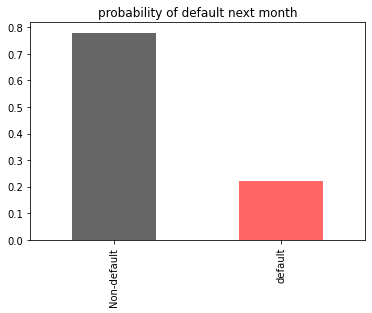

In [19]:
df.default_next_month.value_counts(normalize=True).rename(index={0:"Non-default",1:"default"}).plot(kind="bar",color=["black","red"],alpha=0.6,)
plt.title("probability of default next month");

From the plot we see that about 78% of clients have made their payments duly, roughly 22% of clients have defaulted on their payments. The classes are not represented equally, which is the issue of imbalanced dataset that might cause "accuracy paradox" in the modeling part. 
<br> Strategies to consider:
- Resampling the dataset
- try generate synthetic samples (SMOTE)
- different algorithms
- Try penalized models

In [26]:
# default & non-default payments
lim_bins = [0,10000,50000,100000,150000,200000,250000,300000,500000,1100000]
lim_names = ['0-10000','10000-50000','50000-100000','100000-150000','150000-200000','200000-250000',
            '250000-300000','300000-500000','500000-1100000']
df['LIMIT_BAL_BIN'] = pd.cut(x=df.LIMIT_BAL, bins = lim_bins,labels = lim_names,right=True)

age_bins = [20,30,40,50,60,70,80]
age_names = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=age_bins, labels=age_names,right=True)

df_def = df[df['default_next_month']==1]
df_nondef = df[df['default_next_month']==0]

### LIMIT_BAL

In [29]:
df_def.LIMIT_BAL_BIN.value_counts().sort_index()

0-10000            197
10000-50000       2243
50000-100000      1244
100000-150000      825
150000-200000      710
200000-250000      480
250000-300000      332
300000-500000      582
500000-1100000      23
Name: LIMIT_BAL_BIN, dtype: int64

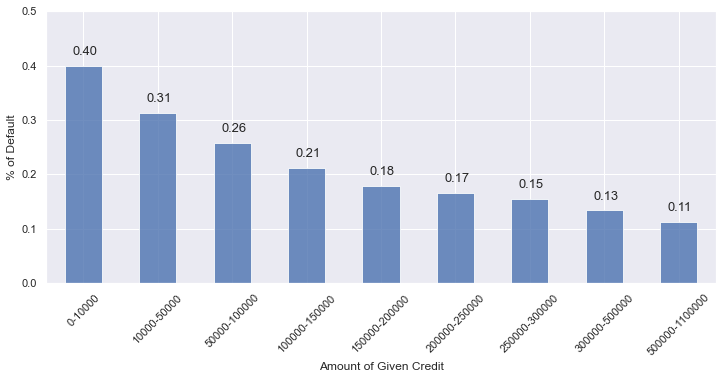

In [43]:

# Probability of default for each range of credit
plt.figure(figsize=(12,5))

def_lim = df_def.LIMIT_BAL_BIN.value_counts().sort_index()
nondef_lim = df_nondef.LIMIT_BAL_BIN.value_counts().sort_index()
def_lim_percen = def_lim/(def_lim+nondef_lim)

ax = def_lim_percen.plot(kind='bar',alpha=0.8)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks(rotation=45)



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.1, p.get_height()+0.02),fontsize=13)

plt.show()

From above plot, we could infer that clients that have alredy defaulted last month will have high probability to default in the next month.

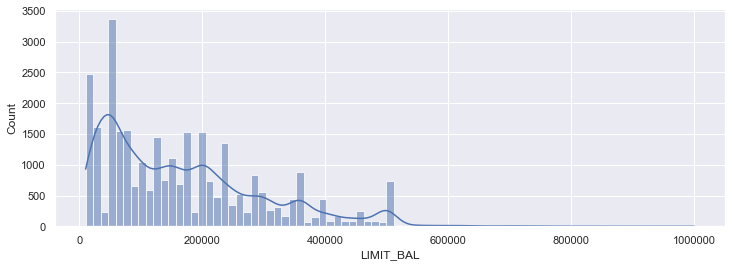

In [46]:
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
sns.histplot(df['LIMIT_BAL'],kde=True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.show()

In [240]:
df.LIMIT_BAL.agg(['mean','std'],axis=0)

mean    167484.322667
std     129747.661567
Name: LIMIT_BAL, dtype: float64

From the plot we see that clients with higher credit limits are less likely to default. The credit limits of most customers are within the range of 0-200000 dollars. So LIMIT_BAL could be a useful feature for default behavior prediction.

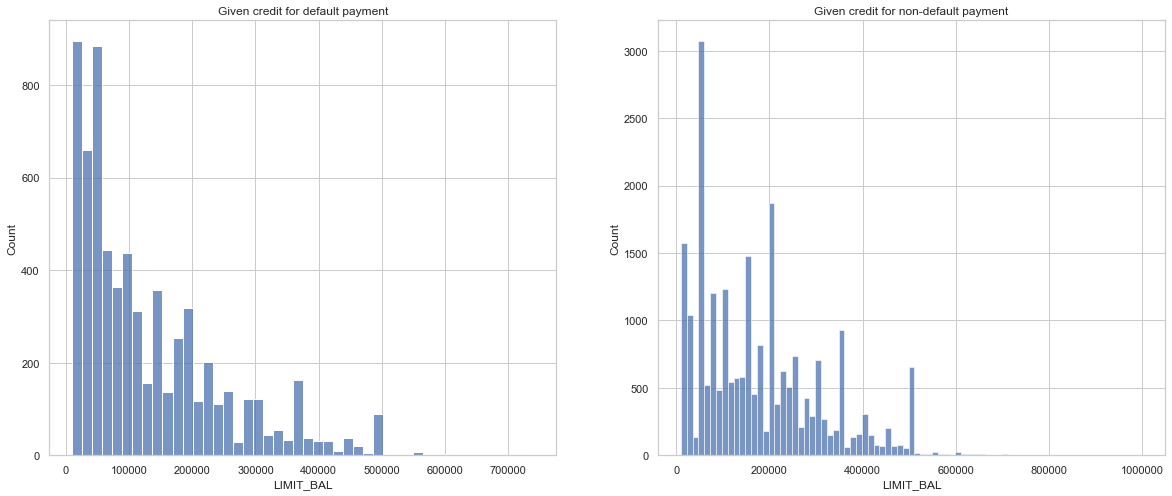

In [47]:
sns.set_style("whitegrid")
plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(df_def.LIMIT_BAL)
plt.title('Given credit for default payment')
plt.subplot(1,2,2)
sns.histplot(df_nondef.LIMIT_BAL)
plt.title('Given credit for non-default payment')
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.show();

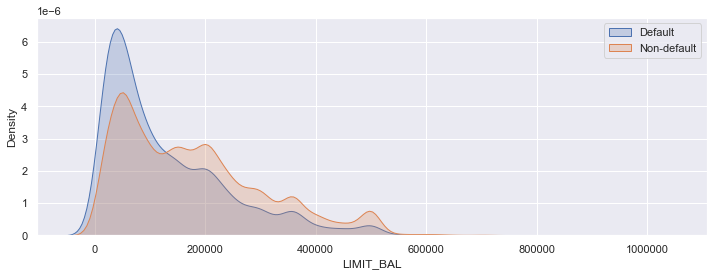

In [330]:
plt.figure(figsize=(12,4)) 
# kernel density estimation
sns.kdeplot(df_def.LIMIT_BAL, label = 'Default', shade=True)
sns.kdeplot(df_nondef.LIMIT_BAL, label = 'Non-default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()

This agrees with our conclusion: clients that are given higher credit limits are less likely to default.

In [243]:
# sex == 1: male
# sex == 2: female
# education 1-4: graduate, university, high, others
# marriage 1-3: married, single, others

### SEX

In [244]:
df['default_next_month'].groupby(df['SEX']).value_counts(normalize=True)

SEX  default_next_month
1    0                     0.758328
     1                     0.241672
2    0                     0.792237
     1                     0.207763
Name: default_next_month, dtype: float64

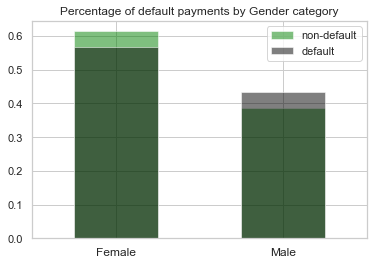

In [48]:
nondef = df_nondef["SEX"].value_counts(normalize=True)
nondef.plot(kind='bar',color='green',label='non-default',legend='default',alpha=0.5)
ddef = df_def["SEX"].value_counts(normalize=True)
ddef.plot(kind='bar',color='black',legend = 'default',label='default',alpha=0.5)
plt.xticks([0,1],['Female','Male'], fontsize = 12,rotation=0);
plt.title('Percentage of default payments by Gender category');

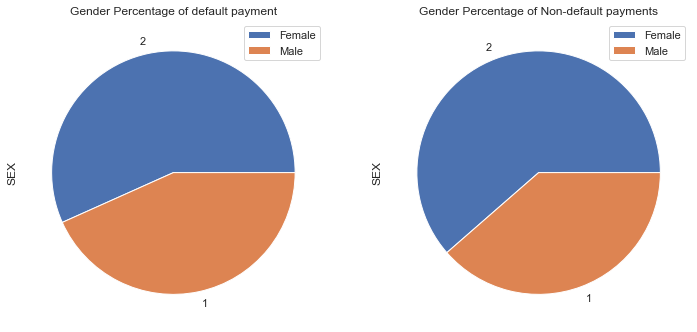

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df_def['SEX'].value_counts().plot.pie()
labels = [r'Female', r'Male']
plt.legend(labels, loc="best")
plt.title('Gender Percentage of default payment')
plt.subplot(1,2,2)
df_nondef['SEX'].value_counts().plot.pie()
plt.legend(labels, loc="best")
plt.title('Gender Percentage of Non-default payments');

We see that both default payments and non-default payment of next month are mostly by female, especially in non-default group. Might not be a very useful feature to fit for our classification model, but could try it later.

### Marriage

Unmarried people tend to default, so MARRIAGE could also be a useful feature

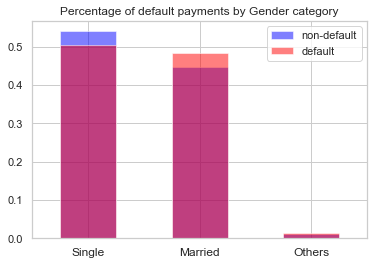

In [50]:
nondef = df_nondef["MARRIAGE"].value_counts(normalize=True)
nondef.plot(kind='bar',color='blue',label='non-default',legend='default',alpha=0.5)
ddef = df_def["MARRIAGE"].value_counts(normalize=True)
ddef.plot(kind='bar',color='red',legend = 'default',label='default',alpha=0.5)
plt.xticks([0,1,2],['Single','Married','Others'], fontsize = 12,rotation=0);
plt.title('Percentage of default payments by Gender category');

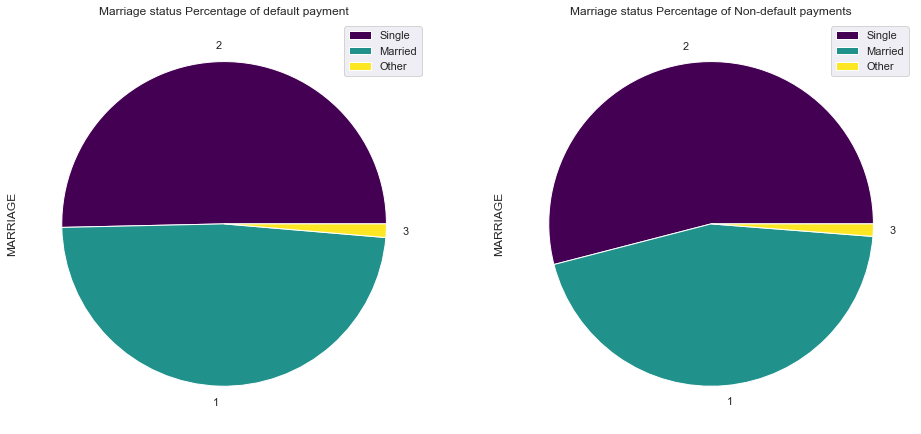

In [318]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df_def['MARRIAGE'].value_counts().plot.pie(cmap='viridis')
labels1 = [r'Single',r'Married',r'Other']
plt.legend(labels1, loc="best")
plt.title('Marriage status Percentage of default payment')
plt.subplot(1,2,2)
df_nondef['MARRIAGE'].value_counts().plot.pie(cmap='viridis')
plt.legend(labels1, loc="best")
plt.title('Marriage status Percentage of Non-default payments');

### Sex & Marriage

In [262]:
df_def.EDUCATION.value_counts()

2    3330
1    2036
3    1237
4      33
Name: EDUCATION, dtype: int64

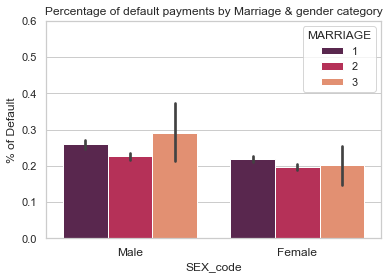

In [51]:
sns.barplot(x = "SEX_code", y = "default_next_month", hue = "MARRIAGE", data = df,palette = 'rocket')
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Percentage of default payments by Marriage & gender category')
plt.show()

Married people tend to have higher probability to default, could be a useful feature.

### Education

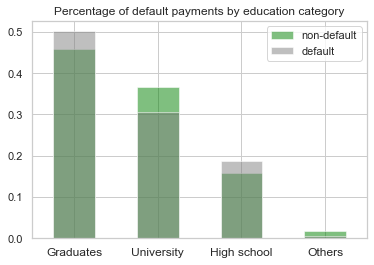

In [52]:
nondef = df_nondef["EDUCATION"].value_counts(normalize=True)
nondef.plot(kind='bar',color='green',label='non-default',legend='default',alpha=0.5)
ddef = df_def["EDUCATION"].value_counts(normalize=True)
ddef.plot(kind='bar',color='gray',legend = 'default',label='default',alpha=0.5)
plt.xticks([0,1,2,3],['Graduates','University', 'High school', 'Others'], fontsize = 12,rotation=0);
plt.title('Percentage of default payments by education category');

Graduates and University students tend to default.

### Education & Sex

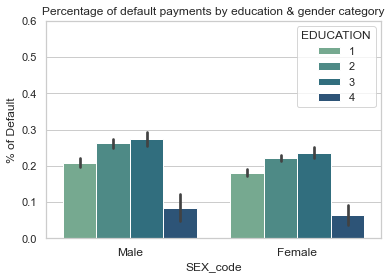

In [53]:
sns.barplot(data = df,x = "SEX_code", y = "default_next_month", hue = "EDUCATION", palette = 'crest')
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Percentage of default payments by education & gender category')
plt.show()

From the plot we see that there's a high proportion of customers who have very high bill amount but did not make the same amount of payments in the past six months. 

From the plot, we see that female tend to have higher probability to default for next month

In [86]:
# default & non-default
df.AGE_BIN.value_counts()

21-30    10899
31-40    10564
41-50     5906
51-60     1963
61-70      254
71-80       15
Name: AGE_BIN, dtype: int64

### Age

In [341]:
df.AGE.min()

21

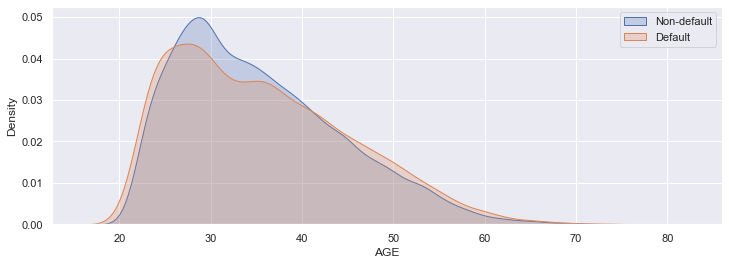

In [54]:
age_bins = [20,30,40,50,60,70,80]
age_names = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=age_bins, labels=age_names).astype('str')

sns.set(font_scale=1)
plt.figure(figsize=(12,4))
sns.kdeplot(df_nondef.AGE, label='Non-default', shade=True) # kernel density estiamtion 
sns.kdeplot(df_def.AGE ,label='Default', shade=True)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()

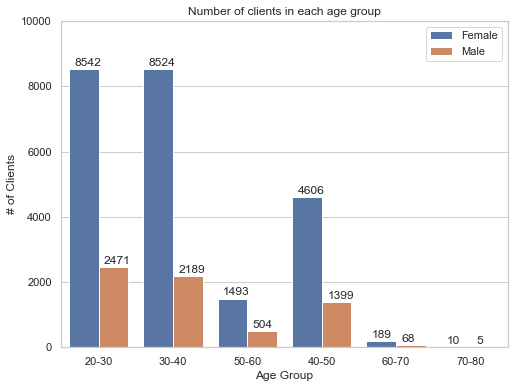

In [57]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax=sns.countplot(data=df, x='AGE_BIN', hue='default_next_month');
labels2 = [r'Default',r'Non-default']
plt.legend(labels, loc="best")
plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,10000)
for i in ax.patches:
    ax.annotate((i.get_height()), (i.get_x()+0.075, i.get_height()+100))
plt.title("Number of clients in each age group");

In [344]:
df.AGE_BIN

0        20-30
1        20-30
2        30-40
3        30-40
4        50-60
         ...  
29995    30-40
29996    40-50
29997    30-40
29998    40-50
29999    40-50
Name: AGE_BIN, Length: 30000, dtype: object

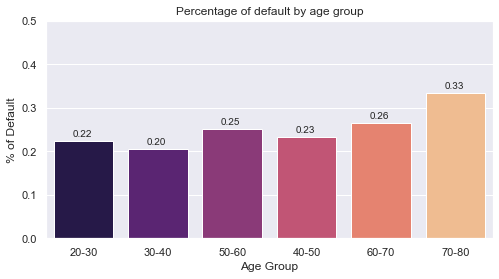

In [61]:
plt.figure(figsize=(8,4))
sns.set(font_scale=1)
ax = sns.barplot(x = 'AGE_BIN', y="default_next_month", data=df , palette = 'magma', ci = None)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for i in ax.patches:
    ax.annotate("%.2f" %(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01),fontsize=10)
plt.title('Percentage of default by age group')
plt.show()

From the plot,we see that the number of default payments is decreasing with the age, age could be a useful feature to predict for the default behavior for next month.

### BILL_AMT  VS. Payments

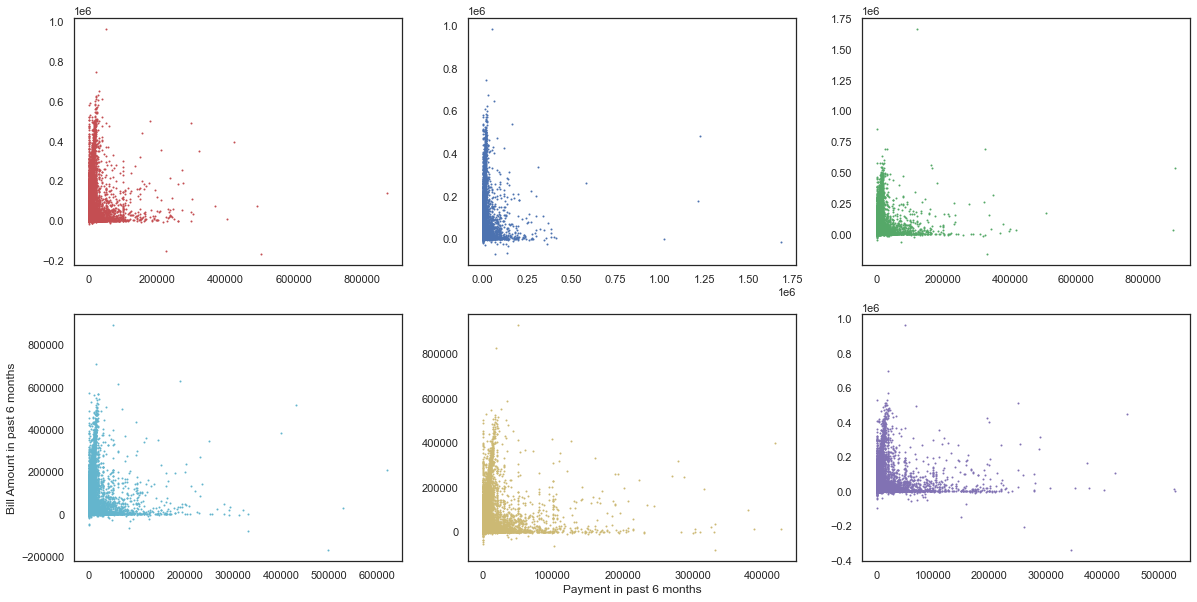

In [67]:
sns.set_style('white')
plt.subplots(figsize=(20,10))

plt.subplot(2,3,1)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(2,3,2)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(2,3,3)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(2,3,4)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months")


plt.subplot(2,3,5)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months")

plt.subplot(2,3,6)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)


plt.show()

In [80]:
df.PAY_1.value_counts()

0    22840
1     3662
2     2640
3      320
4       76
5       24
8       19
6       11
7        9
Name: PAY_1, dtype: int64

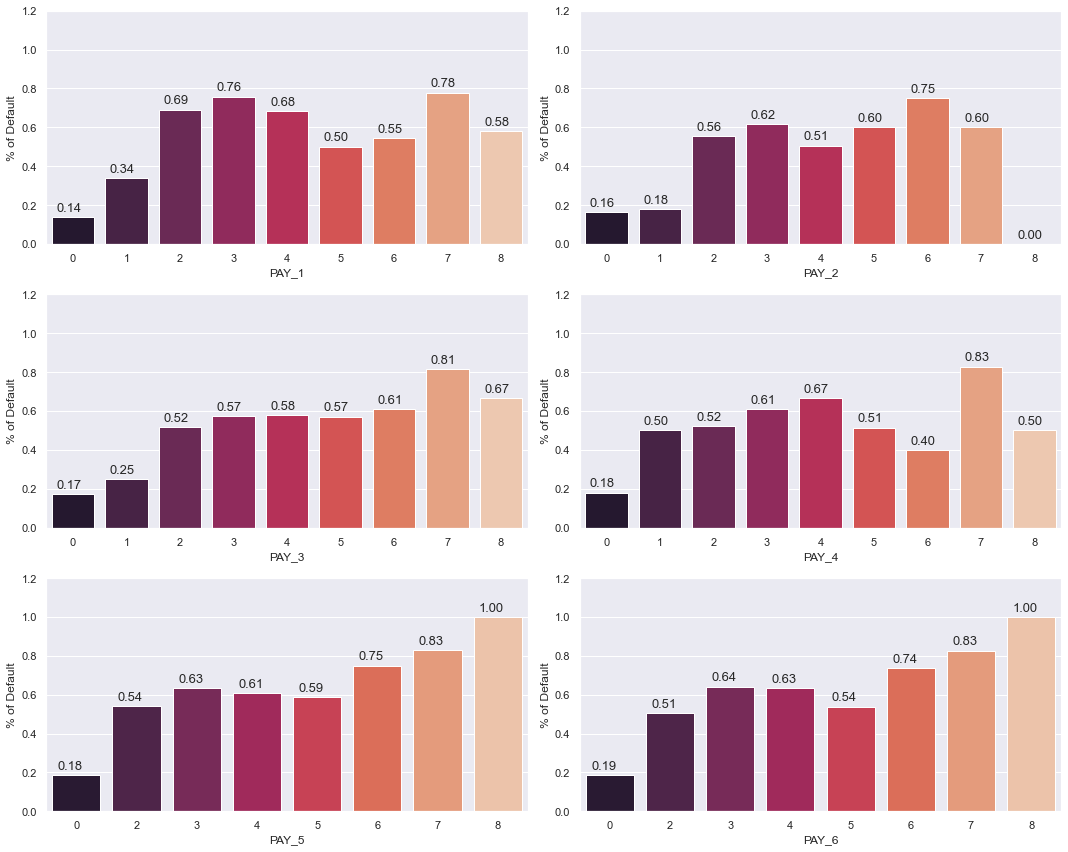

In [347]:
pays = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(pays):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x=col, y="default_next_month", data=df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for i in ax.patches:
        ax.annotate("%.2f" %(i.get_height()), (i.get_x()+0.09, i.get_height()+0.03),fontsize=13)
plt.show()

From above plot, we could infer that clients that have alredy defaulted last month will have high probability to default in the next month.

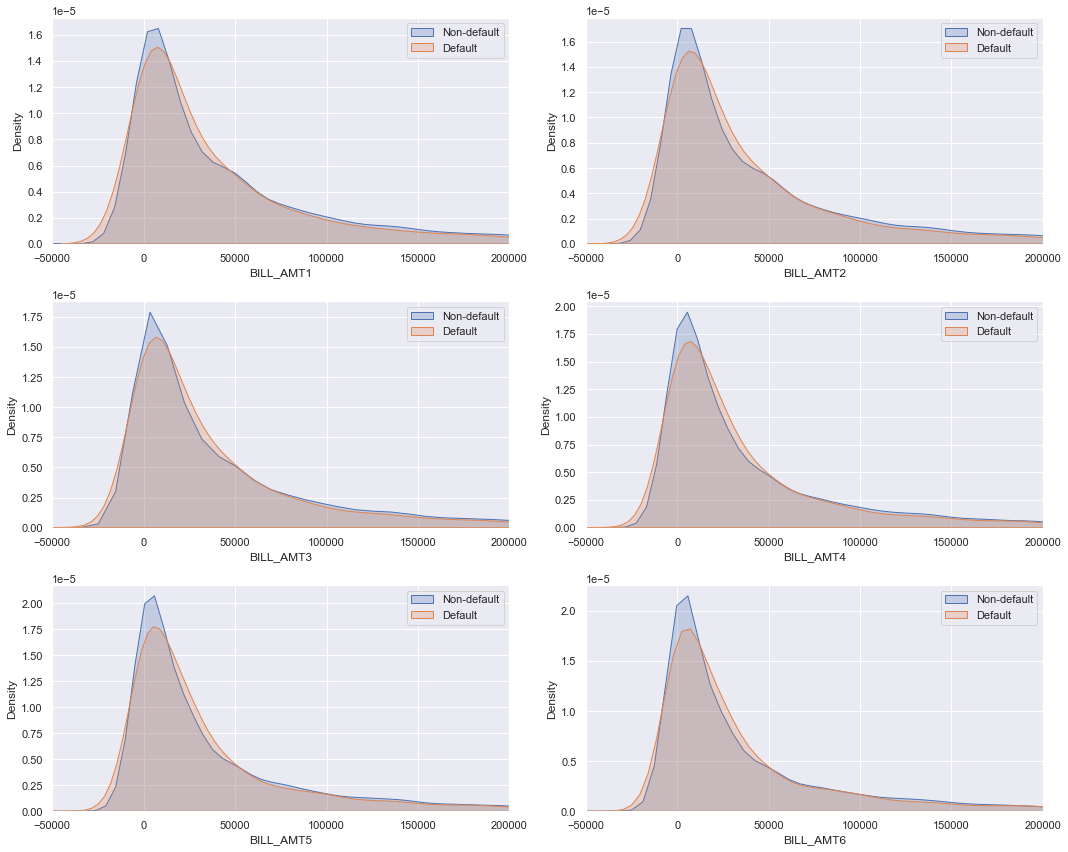

In [334]:
bills = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(bills):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df_nondef.loc[:,col], label = 'Non-default', shade=True)
    sns.kdeplot(df_def.loc[:,col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.legend()
    plt.tight_layout()
plt.show()